# DECISION TREE MODEL FOR SUV DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math                    # Module for mathematics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
suv=pd.read_csv('suv.csv')

In [3]:
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


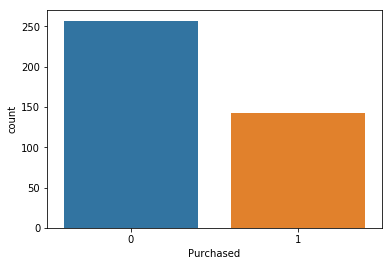

In [4]:
sns.countplot(x='Purchased',data=suv)

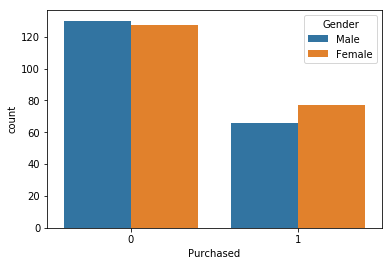

In [5]:
sns.countplot(x='Purchased', hue='Gender',data=suv)

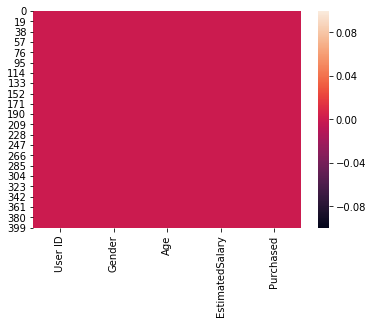

In [6]:
sns.heatmap(suv.isnull()) # No null values

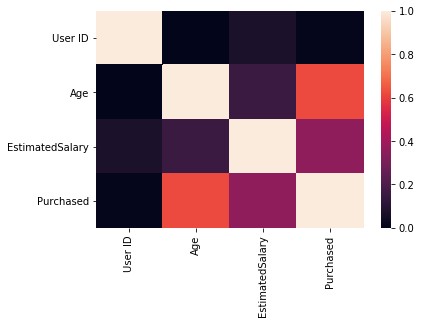

In [7]:
sns.heatmap(suv.corr())

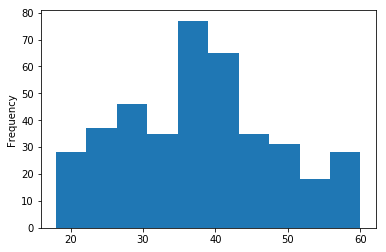

In [8]:
suv.Age.plot.hist()

In [9]:
suv.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
suv=suv.drop(columns=['User ID'], axis=1)

In [11]:
suv = pd.get_dummies(data=suv, columns=['Gender'], drop_first=True)

In [12]:
suv.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [13]:
y = suv['Purchased']

In [14]:
X = suv.drop(columns=['Purchased'], axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [16]:
model_suv = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=100)

In [17]:
model_suv.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [18]:
y_pred = model_suv.predict(X_test)

In [19]:
accuracy_score(y_pred, y_test)

0.8625